In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [124]:
df = pd.read_csv("./data_sets/nfl_team_stats_2002-2022.csv")
pd.set_option('display.max_columns', 50)
df['date']= pd.to_datetime(df['date'])
df['year'] = np.where(df['date'].dt.month > 2 ,df['date'].dt.year, df['date'].dt.year - 1)
df['won'] = np.where(df['score_away'] < df['score_home'], "home", "away")

def split_df(old_df, team, opp):
    new_df = old_df.copy()
    new_df['des'] = team
    new_df['won'] = new_df['won'] == new_df['des']
    new_df.columns = new_df .columns.str.replace(f'_{team}', '').str.replace(f'_{opp}', '_opp')
    return new_df .rename(columns={team: "team", opp: "opp"})

df_away = split_df(df, "away", "home")
df_home = split_df(df, "home", "away")

df = pd.concat([df_away, df_home]).sort_values("date").reset_index(drop=True)

fourth_down_split = df["fourth_downs"].str.split("-", expand = True)
df['fourth_down_att'] = fourth_down_split[1].astype(int)
df['fourth_down_conv'] = fourth_down_split[0].astype(int)

sacks = df["sacks"].str.split("-", expand = True)
df['sacks'] = sacks[0].astype(int)
df['sack_yards'] = sacks[1].astype(int)

df['yards_per_sack'] = df['sack_yards']/df['sacks']

pass_att = df["comp_att"].str.split("-", expand = True)
df['pass_comp'] = pass_att[0].astype(int)
df['pass_att'] = pass_att[1].astype(int)

df['passing_yards_per_att'] = df['passing_yards']/df['pass_att']

df.head()

,date,team,opp,first_downs,first_downs_opp,third_downs,third_downs_opp,fourth_downs,fourth_downs_opp,passing_yards,passing_yards_opp,rushing_yards,rushing_yards_opp,total_yards,total_yards_opp,comp_att,comp_att_opp,sacks,sacks_opp,rushing_attempts,rushing_attempts_opp,fumbles,fumbles_opp,int,int_opp,turnovers,turnovers_opp,penalties,penalties_opp,redzone,redzone_opp,drives,drives_opp,def_st_td,def_st_td_opp,possession,possession_opp,score,score_opp,year,won,des,fourth_down_att,fourth_down_conv,sack_yards,yards_per_sack,pass_comp,pass_att,passing_yards_per_att
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,318,113,43,279,361,16-26,28-45,0,3-24,25,22,0,0,1,3,1,3,5-29,10-80,0-8,0-6,13,15,0,0,27:32,32:28,16,13,2002,True,away,0,0,0,NaN,16,26,6.384615
1,2002-09-05,Giants,49ers,21,13,9-16,4-12,0-1,0-0,318,166,43,113,361,279,28-45,16-26,3,0-0,22,25,0,0,3,1,3,1,10-80,5-29,0-6,0-8,15,13,0,0,32:28,27:32,13,16,2002,False,home,1,0,24,8.000000,28,45,7.066667
2,2002-09-08,Texans,Cowboys,13,11,2-15,2-13,0-0,0-0,123,112,87,155,210,267,10-22,13-30,6,3-19,35,24,0,1,1,1,1,2,11-80,9-117,0-4,0-2,19,18,0,0,33:55,26:05,19,10,2002,True,home,0,0,22,3.666667,10,22,5.590909
3,2002-09-08,Broncos,Rams,18,15,2-10,3-12,1-1,0-1,187,295,104,32,291,327,18-27,32-41,4,3-20,26,13,0,1,2,1,2,2,3-31,6-44,0-1,0-2,2,5,0,0,28:14,31:46,23,16,2002,True,home,1,1,15,3.750000,18,27,6.925926
4,2002-09-08,Jaguars,Colts,19,18,8-16,9-14,3-3,0-0,225,203,118,104,343,307,22-36,19-31,1,1-8,32,28,1,2,1,0,2,2,5-40,2-14,0-8,0-6,16,17,0,2,32:33,27:27,25,28,2002,False,home,3,3,3,3.000000,22,36,6.250000


In [125]:
df.shape

(11282, 49)

In [126]:
df.dtypes

date                     datetime64[ns]
team                             object
opp                              object
first_downs                       int64
first_downs_opp                   int64
third_downs                      object
third_downs_opp                  object
fourth_downs                     object
fourth_downs_opp                 object
passing_yards                     int64
passing_yards_opp                 int64
rushing_yards                     int64
rushing_yards_opp                 int64
total_yards                       int64
total_yards_opp                   int64
comp_att                         object
comp_att_opp                     object
sacks                             int32
sacks_opp                        object
rushing_attempts                  int64
rushing_attempts_opp              int64
fumbles                           int64
fumbles_opp                       int64
int                               int64
int_opp                           int64


In [127]:
df.columns

Index(['date', 'team', 'opp', 'first_downs', 'first_downs_opp', 'third_downs',
       'third_downs_opp', 'fourth_downs', 'fourth_downs_opp', 'passing_yards',
       'passing_yards_opp', 'rushing_yards', 'rushing_yards_opp',
       'total_yards', 'total_yards_opp', 'comp_att', 'comp_att_opp', 'sacks',
       'sacks_opp', 'rushing_attempts', 'rushing_attempts_opp', 'fumbles',
       'fumbles_opp', 'int', 'int_opp', 'turnovers', 'turnovers_opp',
       'penalties', 'penalties_opp', 'redzone', 'redzone_opp', 'drives',
       'drives_opp', 'def_st_td', 'def_st_td_opp', 'possession',
       'possession_opp', 'score', 'score_opp', 'year', 'won', 'des',
       'fourth_down_att', 'fourth_down_conv', 'sack_yards', 'yards_per_sack',
       'pass_comp', 'pass_att', 'passing_yards_per_att'],
      dtype='object')

In [128]:
df.isna().sum()

date                        0
team                        0
opp                         0
first_downs                 0
first_downs_opp             0
third_downs                 0
third_downs_opp             0
fourth_downs                0
fourth_downs_opp            0
passing_yards               0
passing_yards_opp           0
rushing_yards               0
rushing_yards_opp           0
total_yards                 0
total_yards_opp             0
comp_att                    0
comp_att_opp                0
sacks                       0
sacks_opp                   0
rushing_attempts            0
rushing_attempts_opp        0
fumbles                     0
fumbles_opp                 0
int                         0
int_opp                     0
turnovers                   0
turnovers_opp               0
penalties                   0
penalties_opp               0
redzone                     0
redzone_opp                 0
drives                      0
drives_opp                  0
def_st_td 

In [129]:
df.describe()

,date,first_downs,first_downs_opp,passing_yards,passing_yards_opp,rushing_yards,rushing_yards_opp,total_yards,total_yards_opp,sacks,rushing_attempts,rushing_attempts_opp,fumbles,fumbles_opp,int,int_opp,turnovers,turnovers_opp,drives,drives_opp,def_st_td,def_st_td_opp,score,score_opp,year,fourth_down_att,fourth_down_conv,sack_yards,yards_per_sack,pass_comp,pass_att,passing_yards_per_att
count,11282,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,9749.000000,11282.000000,11282.000000,11282.000000
mean,2012-12-01 12:15:11.327778816,19.500975,19.500975,224.402943,224.402943,114.444779,114.444779,338.847722,338.847722,2.287183,27.139426,27.139426,0.631360,0.631360,0.919695,0.919695,1.551055,1.551055,12.177451,12.177451,0.326361,0.326361,22.268924,22.268924,2012.063109,1.023755,0.510814,14.911097,6.507873,20.978550,33.948502,6.664873
min,2002-09-05 00:00:00,3.000000,3.000000,-7.000000,-7.000000,-18.000000,-18.000000,26.000000,26.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2002.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,-0.545455
25%,2007-10-08 00:00:00,16.000000,16.000000,169.000000,169.000000,77.000000,77.000000,281.000000,281.000000,1.000000,21.000000,21.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,11.000000,11.000000,0.000000,0.000000,15.000000,15.000000,2007.000000,0.000000,0.000000,6.000000,5.000000,17.000000,28.000000,5.329235
50%,2012-11-18 00:00:00,19.000000,19.000000,220.000000,220.000000,107.000000,107.000000,339.000000,339.000000,2.000000,27.000000,27.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,12.000000,12.000000,0.000000,0.000000,22.000000,22.000000,2012.000000,1.000000,0.000000,13.000000,6.500000,21.000000,34.000000,6.538462
75%,2017-12-24 00:00:00,23.000000,23.000000,276.000000,276.000000,145.000000,145.000000,396.000000,396.000000,3.000000,32.000000,32.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,13.000000,13.000000,0.000000,0.000000,29.000000,29.000000,2017.000000,2.000000,1.000000,22.000000,8.000000,25.000000,39.000000,7.848485
max,2023-02-12 00:00:00,40.000000,40.000000,522.000000,522.000000,404.000000,404.000000,653.000000,653.000000,12.000000,60.000000,60.000000,5.000000,5.000000,6.000000,6.000000,8.000000,8.000000,26.000000,26.000000,6.000000,6.000000,62.000000,62.000000,2022.000000,7.000000,6.000000,91.000000,28.000000,47.000000,70.000000,19.818182
std,NaN,5.044879,5.044879,78.408835,78.408835,51.730216,51.730216,85.116671,85.116671,1.714162,7.867125,7.867125,0.799334,0.799334,1.006725,1.006725,1.320909,1.320909,2.535568,2.535568,0.782891,0.782891,10.233832,10.233832,6.084584,1.096029,0.754573,12.488100,2.631569,6.127294,8.525880,1.965211


In [130]:
df.head()

,date,team,opp,first_downs,first_downs_opp,third_downs,third_downs_opp,fourth_downs,fourth_downs_opp,passing_yards,passing_yards_opp,rushing_yards,rushing_yards_opp,total_yards,total_yards_opp,comp_att,comp_att_opp,sacks,sacks_opp,rushing_attempts,rushing_attempts_opp,fumbles,fumbles_opp,int,int_opp,turnovers,turnovers_opp,penalties,penalties_opp,redzone,redzone_opp,drives,drives_opp,def_st_td,def_st_td_opp,possession,possession_opp,score,score_opp,year,won,des,fourth_down_att,fourth_down_conv,sack_yards,yards_per_sack,pass_comp,pass_att,passing_yards_per_att
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,318,113,43,279,361,16-26,28-45,0,3-24,25,22,0,0,1,3,1,3,5-29,10-80,0-8,0-6,13,15,0,0,27:32,32:28,16,13,2002,True,away,0,0,0,NaN,16,26,6.384615
1,2002-09-05,Giants,49ers,21,13,9-16,4-12,0-1,0-0,318,166,43,113,361,279,28-45,16-26,3,0-0,22,25,0,0,3,1,3,1,10-80,5-29,0-6,0-8,15,13,0,0,32:28,27:32,13,16,2002,False,home,1,0,24,8.000000,28,45,7.066667
2,2002-09-08,Texans,Cowboys,13,11,2-15,2-13,0-0,0-0,123,112,87,155,210,267,10-22,13-30,6,3-19,35,24,0,1,1,1,1,2,11-80,9-117,0-4,0-2,19,18,0,0,33:55,26:05,19,10,2002,True,home,0,0,22,3.666667,10,22,5.590909
3,2002-09-08,Broncos,Rams,18,15,2-10,3-12,1-1,0-1,187,295,104,32,291,327,18-27,32-41,4,3-20,26,13,0,1,2,1,2,2,3-31,6-44,0-1,0-2,2,5,0,0,28:14,31:46,23,16,2002,True,home,1,1,15,3.750000,18,27,6.925926
4,2002-09-08,Jaguars,Colts,19,18,8-16,9-14,3-3,0-0,225,203,118,104,343,307,22-36,19-31,1,1-8,32,28,1,2,1,0,2,2,5-40,2-14,0-8,0-6,16,17,0,2,32:33,27:27,25,28,2002,False,home,3,3,3,3.000000,22,36,6.250000


NFL Home away 

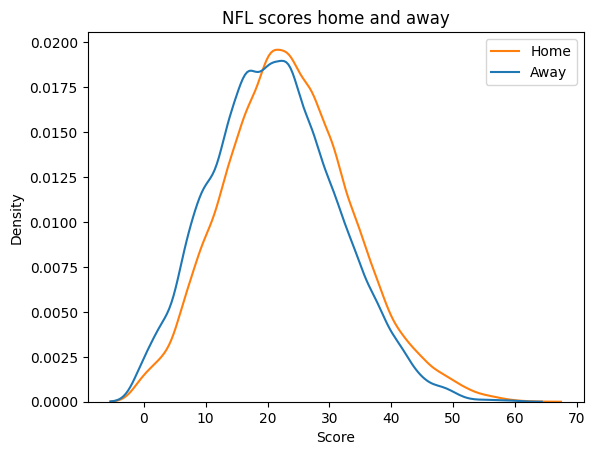

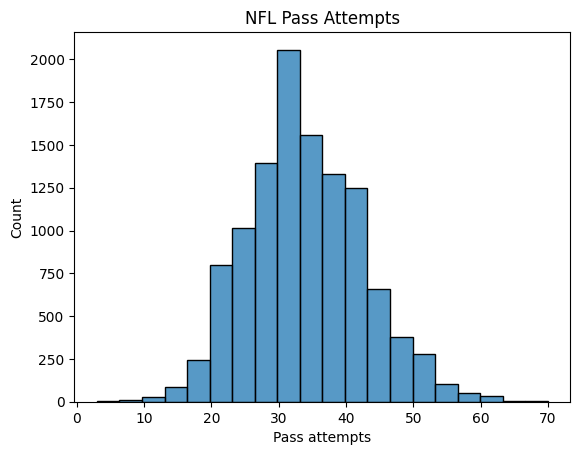

In [143]:
sns.kdeplot(df, x="score", hue="des")
plt.xlabel("Score")
plt.title("NFL scores home and away")
plt.legend(labels=['Home', 'Away'])
plt.show()

sns.histplot(df, x="pass_att", bins=20)
plt.xlabel("Pass attempts")
plt.title("NFL Pass Attempts")
plt.show()



Yard and score changes over years

<Axes: xlabel='rushing_yards', ylabel='passing_yards'>

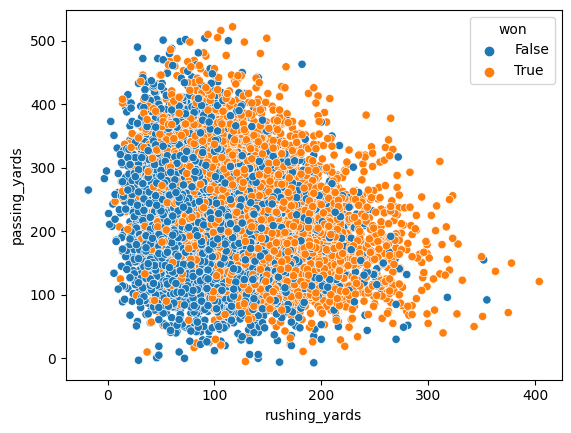

In [132]:
sns.scatterplot(df, x="rushing_yards", y="passing_yards", hue="won")

<Axes: xlabel='fumbles', ylabel='int'>

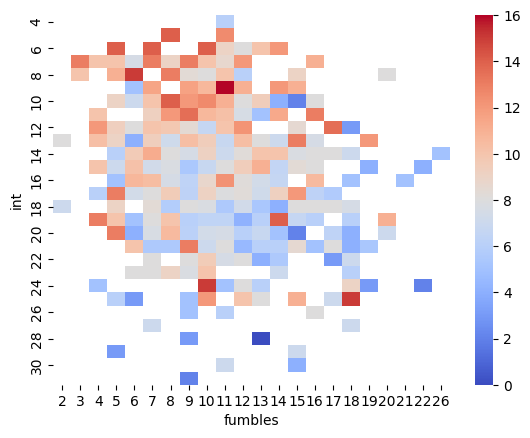

In [133]:
grouped = df.groupby(["team", "year"])[["int", "fumbles", "turnovers", "won"]].sum().groupby(["int", "fumbles"])["won"].mean().reset_index().pivot(index='int', columns='fumbles', values='won')

sns.heatmap(grouped, cmap="coolwarm")

With teams have passing and scoring more every year does this lessen the impact turnovers have on the game?

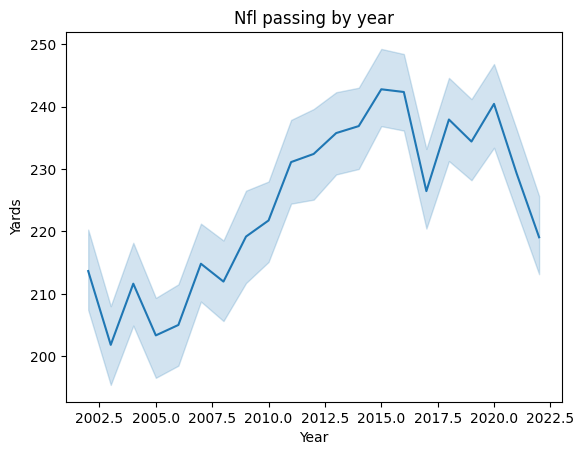

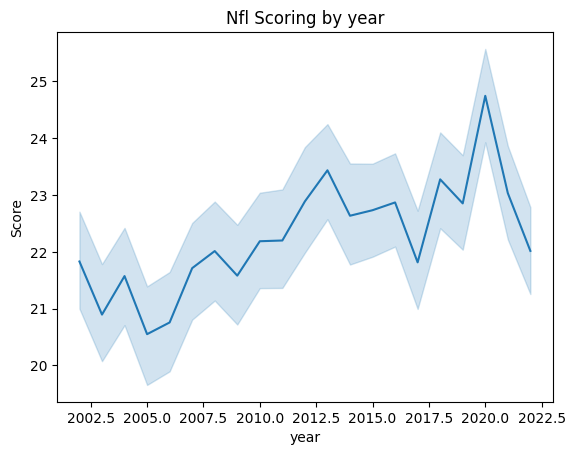

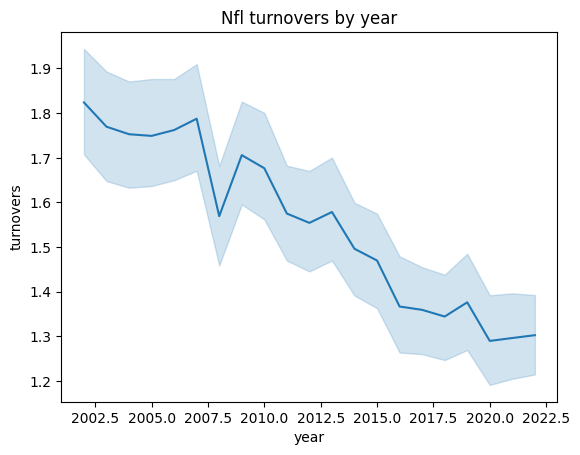

In [134]:
sns.lineplot(df, x="year", y="passing_yards")
plt.xlabel("Year")
plt.ylabel("Yards")
plt.title("Nfl passing by year")
plt.show()

sns.lineplot(df, x="year", y="score")
plt.ylabel("Score")
plt.title("Nfl Scoring by year")
plt.show()

sns.lineplot(df, x="year", y="turnovers")
plt.ylabel("turnovers")
plt.title("Nfl turnovers by year")
plt.show()

C:\Users\Intern\AppData\Local\Temp\ipykernel_11892\790691962.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query["above_passing"] = query["passing_yards"] > query["avg_passing"]
c:\Users\Intern\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


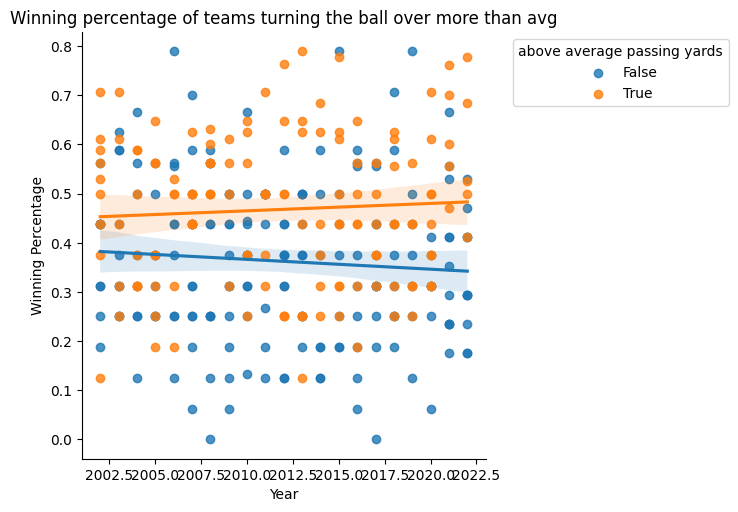

In [135]:
#why is the query only returning 3/32 teams for 2022 should be closer to 16 maybe im cheking for turnovers for every year and not specific year
data = df.groupby(["year", "team"])[['turnovers', "won", "passing_yards"]].mean().reset_index()
data_avg = data.groupby('year')[['turnovers', "passing_yards"]].mean().rename(columns={"turnovers": "avg_to", "passing_yards": "avg_passing"}).reset_index()
data = pd.merge(data, data_avg, on="year")
query = data.query("turnovers > avg_to")
query["above_passing"] = query["passing_yards"] > query["avg_passing"]

sns.lmplot(query, x="year", y="won", hue="above_passing", legend=False)
plt.title("Winning percentage of teams turning the ball over more than avg")
plt.xlabel("Year")
plt.ylabel("Winning Percentage")
plt.legend(title="above average passing yards", bbox_to_anchor=(1.05, 1))


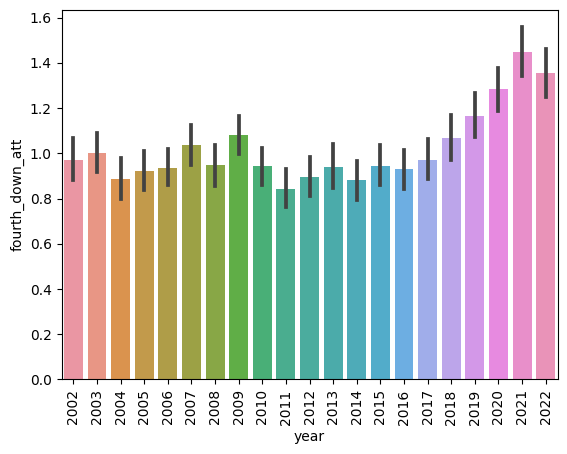

In [136]:
sns.barplot(df, x="year", y="fourth_down_att")
plt.xticks(rotation="vertical")
plt.show()

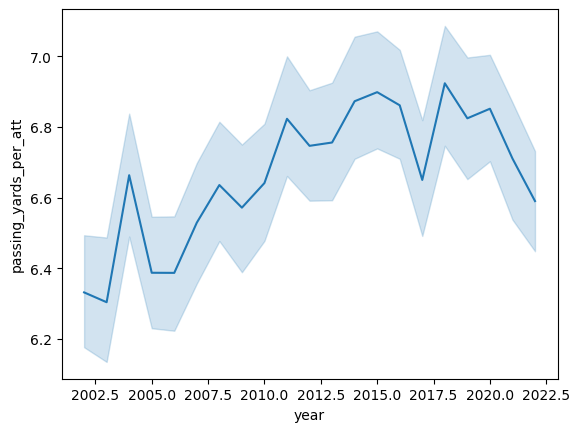

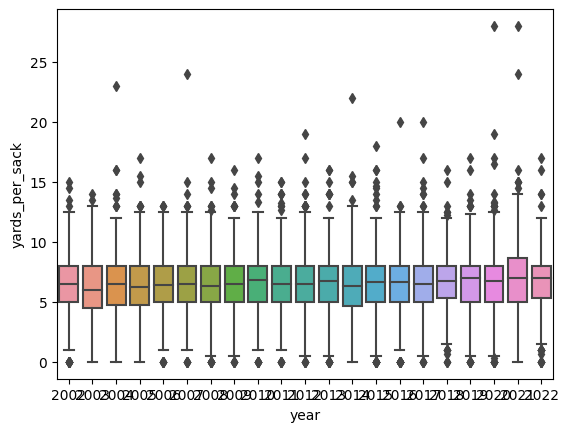

In [139]:
sns.lineplot(df, x="year", y="passing_yards_per_att")
plt.show()

sns.boxplot(df, x="year", y="yards_per_sack")
plt.show()